In [ ]:
!unzip Brains.zip

Archive:  Brains.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflating: brain_

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import (
    layers,
    models,
    callbacks,
    utils,
    metrics,
    optimizers,
)


In [ ]:
import os
import tensorflow as tf

# Directorio de las imágenes
directory_path = '/content/no'
output_directory = '/content/no_resizeddef'

# Creamo el directorio de salida si no existe
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

def load_and_resize_image(image_path):
    # Cargar la imagen
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)

    # Redimensionar la imagen
    img = tf.image.resize(img, [128, 128])

    # Normalizar los datos a [0, 1] si es necesario
    img = img / 255.0

    return img

def save_image(image, filename):
    # Re-escalar los valores a [0, 255] y convertir a uint8
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)

    # Codificar como JPEG
    image_encoded = tf.io.encode_jpeg(image)

    # Guardar la imagen en el sistema de archivos
    tf.io.write_file(filename, image_encoded)

# Listar todos los archivos en el directorio
all_image_paths = [os.path.join(directory_path, fname) for fname in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, fname))]

# Crear un dataset con los caminos de las imágenes
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

# Mapear la función de carga y redimensionado sobre el dataset
image_ds = path_ds.map(load_and_resize_image)

# Guardar las imágenes redimensionadas
for path, image in zip(all_image_paths, image_ds):
    # Construir el nombre del archivo de salida
    filename = os.path.basename(path)
    output_path = os.path.join(output_directory, filename)

    # Guardar la imagen
    save_image(image, output_path)

print(f"Todas las imágenes han sido redimensionadas y guardadas en {output_directory}.")


Todas las imágenes han sido redimensionadas y guardadas en /content/no_resizeddef.


In [ ]:
import os
import tensorflow as tf

# Directorio de las imágenes
directory_path = '/content/no'
output_directory = '/content/no_resized'

# Crear el directorio de salida si no existe
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

def load_and_resize_image(image_path):
    # Cargar la imagen
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)

    # Redimensionar la imagen
    img = tf.image.resize(img, [128, 128])

    # Normalizar los datos a [0, 1] si es necesario
    img = img / 255.0

    return img

def save_image(image, filename):
    # Re-escalar los valores a [0, 255] y convertir a uint8
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)

    # Codificar como JPEG
    image_encoded = tf.io.encode_jpeg(image)

    # Guardar la imagen en el sistema de archivos
    tf.io.write_file(filename, image_encoded)

# Listar todos los archivos en el directorio
all_image_paths = [os.path.join(directory_path, fname) for fname in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, fname))]

# Crear un dataset con los caminos de las imágenes
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

# Mapear la función de carga y redimensionado sobre el dataset
image_ds = path_ds.map(load_and_resize_image)

# Guardar las imágenes redimensionadas
for path, image in zip(all_image_paths, image_ds):
    # Construir el nombre del archivo de salida
    filename = os.path.basename(path)
    output_path = os.path.join(output_directory, filename)

    # Guardar la imagen
    save_image(image, output_path)

print(f"Todas las imágenes han sido redimensionadas y guardadas en {output_directory}.")


Todas las imágenes han sido redimensionadas y guardadas en /content/no_resized.


In [ ]:
IMAGE_SIZE = 128
CHANNELS = 3
BATCH_SIZE = 128
Z_DIM = 128
LEARNING_RATE = 0.0002
ADAM_BETA_1 = 0.5
EPOCHS = 20
CRITIC_STEPS = 5
GP_WEIGHT = 10.0
LOAD_MODEL = False

ADAM_BETA_2 = 0.9

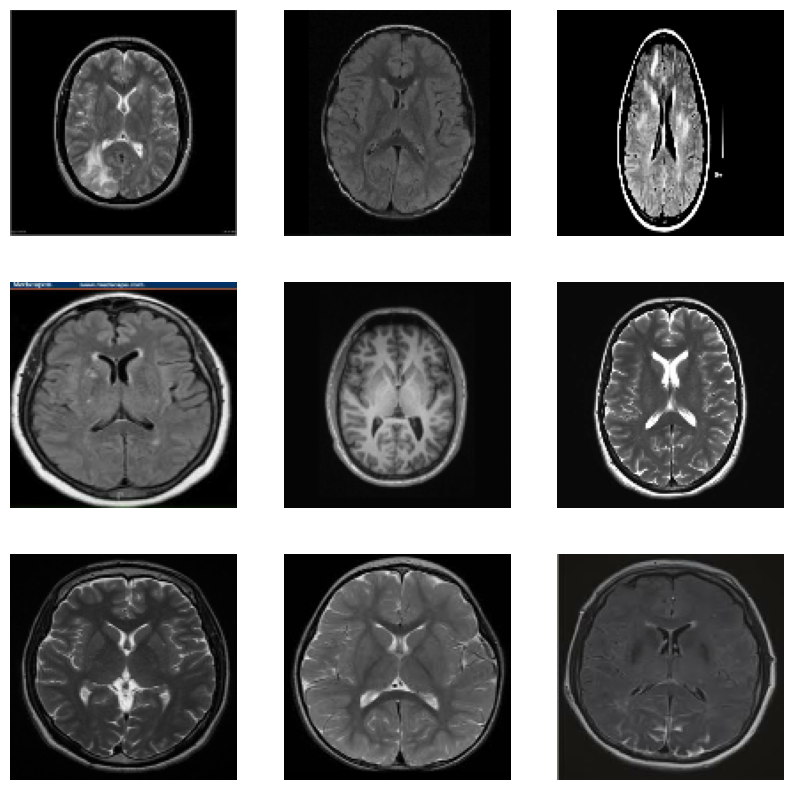

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Variables Constantes
IMG_HEIGHT, IMG_WIDTH = 128, 128
BUFFER_SIZE = 60000
BATCH_SIZE = 128

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = (img - 127.5) / 127.5  # Normalizamos a [-1, 1]
    return img

# Crear  dataset a partir del path
def create_dataset_from_directory(directory_path):
    # Listamos las imagenes del directorio y cmprobamos que el directorio exista
    if not os.path.isdir(directory_path):
        raise ValueError(f"Provided path '{directory_path}' is not a directory.")

    all_image_paths = [os.path.join(directory_path, fname) for fname in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, fname))]

    # Convertimos cada imagen del directorio a datos del tensor mediante la funcion load_image()
    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
    image_ds = path_ds.map(load_image)
    image_ds = image_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    return image_ds

#Cargar Datos entrenamiento
train_dir = '/content/no'  # Ajustar cuando queramos
train_dataset = create_dataset_from_directory(train_dir)

# Funcion para enseñar las images
def show_images(dataset, n_images):
    plt.figure(figsize=(10, 10))
    for images in dataset.take(1):
        for i in range(min(n_images, BATCH_SIZE)):  # Asegurarnos not to exceed batch size
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow((images[i].numpy() + 1) / 2)  # Rescale to [0, 1] for displaying
            plt.axis('off')
    plt.show()
def check_image_sizes(dataset):
    for images in dataset.take(1):  # Cogemos un lote de 128
        print("Batch shape:", images.shape)
        print("Image size within batch:", images.shape[1:3])  # prints (height, width)
        break  # Hacemos break porque para ver las dimensiones no necesitaremos mas que un lote (batch)

# Display  images
show_images(train_dataset, 9)  # Show 9

In [ ]:
check_image_sizes(train_dataset)

Batch shape: (98, 128, 128, 3)
Image size within batch: (128, 128)


In [ ]:
from tensorflow.keras import layers, models

IMAGE_SIZE = 128
CHANNELS = 3

# Input layer  para el critic
critic_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Building the critic architecture
x = layers.Conv2D(64, kernel_size=4, strides=2, padding="same")(critic_input)  # Output shape: ~64x64x64
x = layers.LeakyReLU(0.2)(x)
x = layers.Conv2D(128, kernel_size=4, strides=2, padding="same")(x)  # Output shape: ~32x32x128
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(256, kernel_size=4, strides=2, padding="same")(x)  # Output shape: ~16x16x256
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(512, kernel_size=4, strides=2, padding="same")(x)  # Output shape: ~8x8x512
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(1024, kernel_size=4, strides=2, padding="same")(x)  # Output shape: ~4x4x1024
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)

# Flatten y output layer
x = layers.Flatten()(x)  # Flatten the tensor para el output layer
x = layers.Dense(1)(x)  # Output del critic

# Contruimos el modelo
critic = models.Model(critic_input, x)
critic.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       524544

In [ ]:
from tensorflow.keras import layers, models

# Hyperparameters
Z_DIM = 128  # Dimension del vector ruido
GENERATOR_INITIAL_SIZE = 8
CHANNELS = 3

# Generator input: latent vector
generator_input = layers.Input(shape=(Z_DIM,))

# Empezamos con una dense layerde neuronas  y la redimensionamos  a  un tensor 3D : 8x8x1024
x = layers.Dense(GENERATOR_INITIAL_SIZE * GENERATOR_INITIAL_SIZE * 1024)(generator_input)
x = layers.LeakyReLU(0.2)(x)
x = layers.Reshape((GENERATOR_INITIAL_SIZE, GENERATOR_INITIAL_SIZE, 1024))(x)

# Conv2DTranspose para aumentar el tamaño : 16x16x512
x = layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same")(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.LeakyReLU(0.2)(x)

# Conv2DTranspose 32x32x256
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same")(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.LeakyReLU(0.2)(x)

# Conv2DTranspose  64x64x128
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same")(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.LeakyReLU(0.2)(x)

# Conv2DTranspose  128x128x64
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same")(x)
x = layers.BatchNormalization(momentum=0.8)(x)
x = layers.LeakyReLU(0.2)(x)

# Final Conv2DTranspose para asegurarno que el tamaño del output es el correcto : 128x128x3
x = layers.Conv2DTranspose(CHANNELS, kernel_size=3, strides=1, padding="same", activation="tanh")(x)

# Generator model
generator = models.Model(generator_input, x)
generator.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_1 (Dense)             (None, 65536)             8454144   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 65536)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 512)       8389120   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 16, 16, 512)       2048      
 Normalization)                                            

In [ ]:
class WGANGP(models.Model):
    def __init__(self, critic, generator, latent_dim, critic_steps, gp_weight):
        super(WGANGP, self).__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.critic_steps = critic_steps
        self.gp_weight = gp_weight

    def compile(self, c_optimizer, g_optimizer):
        super(WGANGP, self).compile()
        self.c_optimizer = c_optimizer
        self.g_optimizer = g_optimizer
        self.c_wass_loss_metric = metrics.Mean(name="c_wass_loss")
        self.c_gp_metric = metrics.Mean(name="c_gp")
        self.c_loss_metric = metrics.Mean(name="c_loss")
        self.g_loss_metric = metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [
            self.c_loss_metric,
            self.c_wass_loss_metric,
            self.c_gp_metric,
            self.g_loss_metric,
        ]
    def gradient_penalty(self, batch_size, real_images, fake_images):
        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0,dtype=tf.float32)
        real_images = tf.cast(real_images, tf.float32)
        fake_images = tf.cast(fake_images, tf.float32)

        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            pred = self.critic(interpolated, training=True)

        grads = gp_tape.gradient(pred, [interpolated])[0]
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        for i in range(self.critic_steps):
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )

            with tf.GradientTape() as tape:
                fake_images = self.generator(
                    random_latent_vectors, training=True
                )
                fake_predictions = self.critic(fake_images, training=True)
                real_predictions = self.critic(real_images, training=True)

                c_wass_loss = tf.reduce_mean(fake_predictions) - tf.reduce_mean(
                    real_predictions
                )
                c_gp = self.gradient_penalty(
                    batch_size, real_images, fake_images
                )
                c_loss = c_wass_loss + c_gp * self.gp_weight

            c_gradient = tape.gradient(c_loss, self.critic.trainable_variables)
            self.c_optimizer.apply_gradients(
                zip(c_gradient, self.critic.trainable_variables)
            )

        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_latent_vectors, training=True)
            fake_predictions = self.critic(fake_images, training=True)
            g_loss = -tf.reduce_mean(fake_predictions)

        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )

        self.c_loss_metric.update_state(c_loss)
        self.c_wass_loss_metric.update_state(c_wass_loss)
        self.c_gp_metric.update_state(c_gp)
        self.g_loss_metric.update_state(g_loss)

        return {m.name: m.result() for m in self.metrics}

In [ ]:
# Instanciamos / Creamis la clase GAN
wgangp = WGANGP(
    critic=critic,
    generator=generator,
    latent_dim=Z_DIM,
    critic_steps=CRITIC_STEPS,
    gp_weight=GP_WEIGHT,
)

In [ ]:
# Compile the GAN
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
wgangp.compile(
    c_optimizer=optimizers.Adam(
        learning_rate=LEARNING_RATE, beta_1=ADAM_BETA_1, beta_2=ADAM_BETA_2
    ),
    g_optimizer=optimizers.Adam(
        learning_rate=LEARNING_RATE, beta_1=ADAM_BETA_1, beta_2=ADAM_BETA_2
    ),
)

In [ ]:
class ImageSaverCallback(tf.keras.callbacks.Callback):
    def __init__(self, output_dir, num_images=18, latent_dim=128, img_shape=(128, 128)):
        self.output_dir = output_dir
        self.num_images = num_images
        self.latent_dim = latent_dim
        self.img_shape = img_shape
        # Asegura que el directorio existe sino lo crea
        os.makedirs(output_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        # Revisamos si la epoca es la 14 o a partir de la 14
        if epoch >= 14:
            # Generamos el vector ruido
            random_latent_vectors = tf.random.normal(shape=(self.num_images, self.latent_dim))
            # Generamos Imagenes a partir del ruido
            generated_images = self.model.generator(random_latent_vectors, training=False)
            # Reescalamos los vectores  [-1, 1] a [0, 255]
            generated_images = (generated_images * 0.5 + 0.5) * 255
            generated_images = tf.cast(generated_images, tf.uint8)

            # Guardamos las imagenes generadas en cada epoch
            for i, img in enumerate(generated_images):
                img_path = os.path.join(self.output_dir, f"epoch_{epoch+1}_image_{i+1}.png")
                img = tf.image.resize(img, self.img_shape)  # Hacemos resize para asegurarnos que las imagenes se guardaran con el mismo tamaño
                tf.keras.preprocessing.image.save_img(img_path, img)


#Llamamos a la clase y la guardamos enimage_saver_callback
image_saver_callback = ImageSaverCallback(output_dir="/content/yes_resized", num_images=18, latent_dim=Z_DIM)

In [ ]:
# Creamos un checkpoint
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="/content/checkpoint/checkpoint.ckpt",
    save_weights_only=True,
    save_freq="epoch",
    verbose=0,
)
#LLamamos a los logs de tensorboard mediante un callback para ver las metricas
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


In [ ]:

wgangp.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=400,
    callbacks=[
       model_checkpoint_callback,
        tensorboard_callback,
       image_saver_callback
    ],
)

Epoch 1/20
400/400 [==============================] - 497s 1s/step - c_loss: -85.4956 - c_wass_loss: -134.0541 - c_gp: 4.8559 - g_loss: 60.7527
Epoch 2/20
400/400 [==============================] - 462s 1s/step - c_loss: -40.5144 - c_wass_loss: -56.6789 - c_gp: 1.6164 - g_loss: 61.2136
Epoch 3/20
400/400 [==============================] - 462s 1s/step - c_loss: -47.7403 - c_wass_loss: -68.6901 - c_gp: 2.0950 - g_loss: 51.7612
Epoch 4/20
400/400 [==============================] - 462s 1s/step - c_loss: -51.7260 - c_wass_loss: -74.7332 - c_gp: 2.3007 - g_loss: 38.7370
Epoch 5/20
400/400 [==============================] - 462s 1s/step - c_loss: -52.4368 - c_wass_loss: -76.1880 - c_gp: 2.3751 - g_loss: 34.6644
Epoch 6/20
400/400 [==============================] - 462s 1s/step - c_loss: -52.8955 - c_wass_loss: -76.7916 - c_gp: 2.3896 - g_loss: 35.4109
Epoch 7/20
400/400 [==============================] - 462s 1s/step - c_loss: -52.3846 - c_wass_loss: -76.2200 - c_gp: 2.3835 - g_loss: 29.473

In [ ]:
!zip -r situmorbrain.zip  /content/yes_resized

  adding: content/yes_resized/ (stored 0%)
  adding: content/yes_resized/epoch_18_image_13.png (stored 0%)
  adding: content/yes_resized/epoch_20_image_8.png (stored 0%)
  adding: content/yes_resized/Y106.jpg (deflated 2%)
  adding: content/yes_resized/Y85.JPG (deflated 2%)
  adding: content/yes_resized/Y10.jpg (deflated 3%)
  adding: content/yes_resized/Y253.JPG (deflated 2%)
  adding: content/yes_resized/Y102.jpg (deflated 2%)
  adding: content/yes_resized/epoch_16_image_16.png (stored 0%)
  adding: content/yes_resized/Y38.jpg (deflated 2%)
  adding: content/yes_resized/epoch_16_image_17.png (deflated 0%)
  adding: content/yes_resized/Y39.jpg (deflated 2%)
  adding: content/yes_resized/Y244.JPG (deflated 2%)
  adding: content/yes_resized/epoch_16_image_14.png (deflated 0%)
  adding: content/yes_resized/Y18.JPG (deflated 3%)
  adding: content/yes_resized/Y146.JPG (deflated 3%)
  adding: content/yes_resized/Y12.jpg (deflated 2%)
  adding: content/yes_resized/epoch_18_image_3.png (store